# Scalar plane waves in general relativity by Halilsoy
##  Geoff Cope
##  Univeristy of Utah
##  December 31, 2021

https://www.youtube.com/watch?v=IkHVQr7c-RU

https://www.researchgate.net/publication/226112250_Scalar _plane_waves _in _general _relativity

In [1]:
from sympy import init_session
init_session(use_latex=True)

IPython console for SymPy 1.9 (Python 3.8.8-64-bit) (ground types: gmpy)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.9/



In [2]:
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

In [3]:
u,v,x,y,du,dv,dx,dy = symbols( 'u v x y du dv dx dy' ) 

In [4]:
M = Function('M')(u,v)
M

In [5]:
U = Function('U')(u,v)
U

In [6]:
V = Function('V')(u,v)
V

In [7]:
variables = Matrix( [u,v,x,y] )
variables

⎡u⎤
⎢ ⎥
⎢v⎥
⎢ ⎥
⎢x⎥
⎢ ⎥
⎣y⎦

In [8]:
differentials = Matrix( [du,dv,dx,dy] ) 
differentials

⎡du⎤
⎢  ⎥
⎢dv⎥
⎢  ⎥
⎢dx⎥
⎢  ⎥
⎣dy⎦

In [51]:
lineElement = expand( 2*exp(-M)*du*dv - exp(-U) * ( exp(V)*dx**2 + exp(-V)*dy**2 ) ) 
lineElement

In [52]:
g = zeros(4)

for i in range(4):
    for j in range(4):
        if i == j:
            g[i,j] = lineElement.coeff( differentials[i],2 ) 
        else:
            g[i,j] = Rational(1,2)*lineElement.coeff( differentials[i]*differentials[j],1 )
            
g

⎡            -M(u, v)                                           ⎤
⎢    0      ℯ                   0                    0          ⎥
⎢                                                               ⎥
⎢ -M(u, v)                                                      ⎥
⎢ℯ              0               0                    0          ⎥
⎢                                                               ⎥
⎢                        -U(u, v)  V(u, v)                      ⎥
⎢    0          0      -ℯ        ⋅ℯ                  0          ⎥
⎢                                                               ⎥
⎢                                             -U(u, v)  -V(u, v)⎥
⎣    0          0               0           -ℯ        ⋅ℯ        ⎦

In [53]:
import sympy

In [54]:
m = sympy.Array(g)
m

⎡            -M(u, v)                                           ⎤
⎢    0      ℯ                   0                    0          ⎥
⎢                                                               ⎥
⎢ -M(u, v)                                                      ⎥
⎢ℯ              0               0                    0          ⎥
⎢                                                               ⎥
⎢                        -U(u, v)  V(u, v)                      ⎥
⎢    0          0      -ℯ        ⋅ℯ                  0          ⎥
⎢                                                               ⎥
⎢                                             -U(u, v)  -V(u, v)⎥
⎣    0          0               0           -ℯ        ⋅ℯ        ⎦

In [13]:
from einsteinpy.symbolic import *

In [55]:
syms = sympy.symbols("u v x y")
u,v,x,y = syms

In [56]:
metric = MetricTensor(m,syms)

In [57]:
ch = ChristoffelSymbols.from_metric(metric)
ch.tensor()

⎡                                                                                           
⎢⎡ ∂                                                                                        
⎢⎢-──(M(u, v))  0                                       0                                   
⎢⎢ ∂u                                                                                       
⎢⎢                                                                                          
⎢⎢     0        0                                       0                                   
⎢⎢                                                                                          
⎢⎢                 ⎛   -U(u, v)  V(u, v) ∂              -U(u, v)  V(u, v) ∂          ⎞  M(u,
⎢⎢                 ⎜- ℯ        ⋅ℯ       ⋅──(U(u, v)) + ℯ        ⋅ℯ       ⋅──(V(u, v))⎟⋅ℯ    
⎢⎢                 ⎝                     ∂v                               ∂v         ⎠      
⎢⎢     0        0  ───────────────────────────────────────────────────

In [58]:
Ric = RicciTensor.from_metric(metric)
Ric.tensor()

⎡                                             2                               2             
⎢                                ⎛∂          ⎞                   ⎛∂          ⎞            ∂ 
⎢                                ⎜──(U(u, v))⎟      2            ⎜──(V(u, v))⎟            ──
⎢      ∂           ∂             ⎝∂u         ⎠     ∂             ⎝∂u         ⎠            ∂u
⎢      ──(M(u, v))⋅──(U(u, v)) - ────────────── + ───(U(u, v)) - ──────────────         - ──
⎢      ∂u          ∂u                  2            2                  2                    
⎢                                                 ∂u                                        
⎢                                                                                           
⎢                                                                                           
⎢  ∂           ∂             ∂           ∂                                                  
⎢  ──(U(u, v))⋅──(U(u, v))   ──(V(u, v))⋅──(V(u, v))      2           

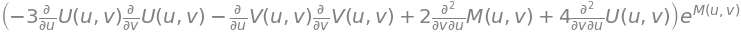

In [59]:
R = RicciScalar.from_riccitensor(Ric)
R.simplify()
R.expr

In [60]:
einst = EinsteinTensor.from_metric(metric)
einst.tensor()

⎡                                       2                               2                   
⎢                          ⎛∂          ⎞                   ⎛∂          ⎞                    
⎢                          ⎜──(U(u, v))⎟      2            ⎜──(V(u, v))⎟                    
⎢∂           ∂             ⎝∂u         ⎠     ∂             ⎝∂u         ⎠                    
⎢──(M(u, v))⋅──(U(u, v)) - ────────────── + ───(U(u, v)) - ──────────────                1.0
⎢∂u          ∂u                  2            2                  2                          
⎢                                           ∂u                                              
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                               2                     

In [ ]:
#  rm1 = RiemannCurvatureTensor.from_christoffels(ch)
#  rm1.tensor()

In [20]:
#  weyl = WeylTensor.from_metric(metric)
#  weyl.tensor()

In [72]:
einsteinSimplified = simplify(einst.tensor())
einsteinSimplified

⎡                                       2                               2                   
⎢                          ⎛∂          ⎞                   ⎛∂          ⎞                    
⎢                          ⎜──(U(u, v))⎟      2            ⎜──(V(u, v))⎟                    
⎢∂           ∂             ⎝∂u         ⎠     ∂             ⎝∂u         ⎠                    
⎢──(M(u, v))⋅──(U(u, v)) - ────────────── + ───(U(u, v)) - ──────────────                1.0
⎢∂u          ∂u                  2            2                  2                          
⎢                                           ∂u                                              
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                               2                     

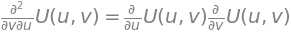

In [84]:
equation4a =  Eq(diff(U,u,v) , solve( einst.tensor()[1,0] , diff(U,u,v) )[0] ) 
equation4a

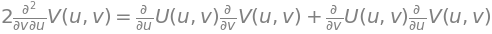

In [87]:
equation4b = Eq(  2*diff(V,u,v) ,2* solve( simplify( Ric.tensor()[2,2].args[0] - Ric.tensor()[3,3].args[0] ) , diff(V,u,v) )[0] )
equation4b 

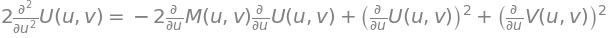

In [85]:
equation4c = Eq(  2*diff(U,u,u) , 2*solve( einst.tensor()[0,0] , diff(U,u,u) )[0] ) 
equation4c

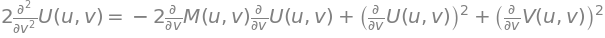

In [93]:
equation4d = Eq(  2*diff(U,v,v) , 2*solve( einst.tensor()[1,1] , diff(U,v,v) )[0] ) 
equation4d 

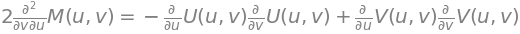

In [92]:
equation4e =Eq(  2*diff(M,u,v) , 2*solve( simplify( einsteinSimplified[2,2].args[0] + einsteinSimplified[3,3].args[0] ), diff(M,u,v) )[0] ).subs(equation4a.args[0],equation4a.args[1])
equation4e

In [95]:
Matrix([equation4a,equation4b,equation4c,equation4d,equation4e])

⎡                      2                                                       ⎤
⎢                     ∂              ∂           ∂                             ⎥
⎢                   ─────(U(u, v)) = ──(U(u, v))⋅──(U(u, v))                   ⎥
⎢                   ∂v ∂u            ∂u          ∂v                            ⎥
⎢                                                                              ⎥
⎢          2                                                                   ⎥
⎢         ∂              ∂           ∂             ∂           ∂               ⎥
⎢     2⋅─────(V(u, v)) = ──(U(u, v))⋅──(V(u, v)) + ──(U(u, v))⋅──(V(u, v))     ⎥
⎢       ∂v ∂u            ∂u          ∂v            ∂v          ∂u              ⎥
⎢                                                                              ⎥
⎢    2                                                       2                2⎥
⎢   ∂                 ∂           ∂             ⎛∂          ⎞    ⎛∂          ⎞ ⎥
⎢2⋅───(U(u, v)) = - 2⋅──(M(u